### Unsupervised Labelling

**Import required libraries**

In [40]:
import numpy as np
import matplotlib.pyplot as plt


In [25]:
# Reference Used : 
#################################
# author : Dr. Satyanath Bhat 
# filename : classdemo.py
#################################


import numpy as np

ta = 0.1   # bias of coina
tb = 0.8   # BIAS of coinb
d = 10
n= 3000     #total samples
z = np.zeros(n) #hidden A =0 B=1
x = np.zeros(n) #number of heads
for i in range(n):
    if np.random.uniform() <0.5:
        x[i]  = np.random.binomial(d,ta)
    else:
        x[i]  = np.random.binomial(d,tb)
        z[i]=1
        
## forget zs
currAEst = 0.51 #beta or uniform choices are ok  
currBEst = 0.534

repeatcount = 1000  # instead of checking for convergence
gammaiA = np.zeros(n)
gammaiB = np.zeros(n)
for i in range(repeatcount):
    ## EStep starts
    for j in range(n):
        gammaiA[j] = 0.5* np.power(currAEst,x[j]) *np.power(1-currAEst,d-x[j]) 
        gammaiA[j] /= (0.5*np.power(currAEst,x[j]) *np.power(1-currAEst,d-x[j]) + 0.5* np.power(currBEst,x[j]) *np.power(1-currBEst,d-x[j]) )
        gammaiB[j] = 1 - gammaiA[j]
    numA = denA = numB = denB = 0
    #Estep ends
    
    #MStep starts
    for k in range(n):       
        numA += gammaiA[k]*x[k]
        numB += gammaiB[k]*x[k]
        denA += gammaiA[k]*d
        denB += gammaiB[k]*d
    currAEst = numA/denA
    currBEst = numB/denB
    #Msteps ends

print(ta,tb,currAEst,currBEst)

0.1 0.8 0.102109498846473 0.8003189042847692


In [29]:
# classify each coin based on current estimate of biases

classified_Z = []
for i in range(len(x)): 
    p = x[i]/d 
    j = np.argmin([abs(currAEst-p), abs(currBEst-p)])
    classified_Z.append(j*1.0)

# Error rate 
Error  = [ 0 if classified_Z[i]==z[i] else  1 for i in range(n)]

error_rate = ( sum(Error)/len(Error) )*100
print("Error Rate : %f "%error_rate,"%")

Error Rate : 0.266667  %


**Lets Simulate this experiment**

In [36]:
# Reference Used : 
#################################
# author : Dr. Satyanath Bhat 
# filename : classdemo.py
#################################

def one_experiment(ta = 0.1, tb = 0.8, d=10, n=3000):
    z = np.zeros(n) #hidden A =0 B=1
    x = np.zeros(n) #number of heads
    for i in range(n):
        if np.random.uniform() <0.5:
            x[i]  = np.random.binomial(d,ta)
        else:
            x[i]  = np.random.binomial(d,tb)
            z[i]=1

    ## forget zs
    currAEst = 0.51 #beta or uniform choices are ok  
    currBEst = 0.534

    repeatcount = 1000  # instead of checking for convergence
    gammaiA = np.zeros(n)
    gammaiB = np.zeros(n)
    for i in range(repeatcount):
        ## EStep starts
        for j in range(n):
            gammaiA[j] = 0.5* np.power(currAEst,x[j]) *np.power(1-currAEst,d-x[j]) 
            gammaiA[j] /= (0.5*np.power(currAEst,x[j]) *np.power(1-currAEst,d-x[j]) + 0.5* np.power(currBEst,x[j]) *np.power(1-currBEst,d-x[j]) )
            gammaiB[j] = 1 - gammaiA[j]
        numA = denA = numB = denB = 0
        #Estep ends

        #MStep starts
        for k in range(n):       
            numA += gammaiA[k]*x[k]
            numB += gammaiB[k]*x[k]
            denA += gammaiA[k]*d
            denB += gammaiB[k]*d
        currAEst = numA/denA
        currBEst = numB/denB
        #Msteps ends
    
    
    # classify each coin based on current estimate of biases

    classified_Z = []
    for i in range(len(x)): 
        p = x[i]/d 
        j = np.argmin([abs(currAEst-p), abs(currBEst-p)])
        classified_Z.append(j*1.0)

    # Error rate 
    Error  = [ 0 if classified_Z[i]==z[i] else  1 for i in range(n)]

    error_rate = ( sum(Error)/len(Error) )*100
    return error_rate

def n_experiments(ta = 0.1, tb = 0.8, d=10, n=3000): 
    errors = []
    for i in range(20): 
        error = one_experiment(ta, tb, d, n)
        errors.append(error)
    return errors

In [37]:
ta = 0.1   # bias of coina
tb = 0.8   # bias of coinb
d = 10
n= 3000     #total samples
errors = n_experiments(ta,tb,d,n)

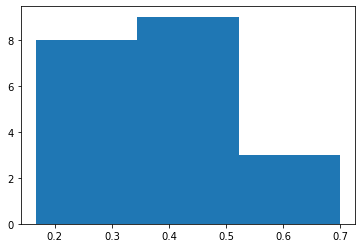

Average Error :  0.3966666666666666


In [44]:
plt.hist(errors,bins=3)
plt.show()

print("Average Error : ", np.mean(errors))